## MNIST_DigitClassifier

**Objective**:
  * Use Scikit learn's MNIST dataset and classify the digits using Neural Network.

### Load the dataset

In [1]:
from sklearn import datasets

In [16]:
import numpy as np

In [17]:
print(np.__version__)

1.14.2


In [4]:
?datasets.mldata

### Get the MNIST data from mldata.org

In [8]:
mnist = datasets.fetch_mldata('MNIST Original')

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
type(mnist)

sklearn.utils.Bunch

In [11]:
mnist.COL_NAMES

['label', 'data']

In [12]:
mnist.DESCR

'mldata.org dataset: mnist-original'

#### About MNIST data
 * 70K samples
 * Each sample of size 784 (intensity vaues from 0 thru 255).
 * Targets: 0 thru 9

In [13]:
mnist.data.shape

(70000, 784)

In [14]:
mnist.target.shape

(70000,)

In [19]:
np.unique(mnist.target)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [21]:
type(mnist.data[0])

numpy.ndarray

In [26]:
#mnist.data[0]

In [23]:
## normalize the input data, ie make it in the range [0, 1.0]

data = mnist.data.astype(float) / 255.0

In [24]:
type(data)

numpy.ndarray

In [27]:
#data[0]

## Split the data

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
(trainX, testX, trainY, testY) = train_test_split(data, mnist.target, test_size=0.25, random_state=123)

#### Encode (one-hot) the target values

In [30]:
from sklearn.preprocessing import LabelBinarizer

In [31]:
lb = LabelBinarizer()

In [32]:
trainY = lb.fit_transform(trainY)

In [33]:
testY = lb.transform(testY)

In [35]:
## 5 is encoded as 0000010000
trainY[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

## Build Neural Net model using Keras

In [40]:
from keras.models import Sequential

Using Theano backend.


In [42]:
from keras.layers.core import Dense

#### Define 784(input data)-256-128-10 (output) archiecture

In [41]:
model = Sequential()

In [43]:
?Dense

In [46]:
model.add(Dense(256, input_shape=(784,), activation='sigmoid' )) # first layer, specify the input shape

In [47]:
model.add(Dense(128, activation='sigmoid'))

In [48]:
# output layer - need probabilities, so use softmax for activation
model.add(Dense(10, activation='softmax'))

## Training the Network

In [49]:
from keras.optimizers import SGD

In [50]:
?SGD

In [51]:
sgd = SGD(0.01)

In [55]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'] )

In [56]:
?model.fit

In [57]:
# collect the history during fit
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

Train on 52500 samples, validate on 17500 samples
Epoch 1/100
52500/52500 [==============================] - 1s 28us/step - loss: 2.2962 - acc: 0.1747 - val_loss: 2.2530 - val_acc: 0.3673
Epoch 2/100
52500/52500 [==============================] - 1s 28us/step - loss: 2.2254 - acc: 0.3562 - val_loss: 2.1950 - val_acc: 0.4875
Epoch 3/100
52500/52500 [==============================] - 1s 28us/step - loss: 2.1600 - acc: 0.5060 - val_loss: 2.1194 - val_acc: 0.5657
Epoch 4/100
52500/52500 [==============================] - 1s 28us/step - loss: 2.0709 - acc: 0.5791 - val_loss: 2.0156 - val_acc: 0.6191
Epoch 5/100
52500/52500 [==============================] - 2s 29us/step - loss: 1.9463 - acc: 0.6321 - val_loss: 1.8685 - val_acc: 0.6562
Epoch 6/100
52500/52500 [==============================] - 2s 29us/step - loss: 1.7785 - acc: 0.6611 - val_loss: 1.6800 - val_acc: 0.6820
Epoch 7/100
52500/52500 [==============================] - 1s 28us/step - loss: 1.5803 - acc: 0.6905 - val_loss: 1.4764 - 

52500/52500 [==============================] - 1s 27us/step - loss: 0.3276 - acc: 0.9064 - val_loss: 0.3300 - val_acc: 0.9069
Epoch 60/100
52500/52500 [==============================] - 1s 27us/step - loss: 0.3257 - acc: 0.9068 - val_loss: 0.3282 - val_acc: 0.9070
Epoch 61/100
52500/52500 [==============================] - 1s 26us/step - loss: 0.3240 - acc: 0.9071 - val_loss: 0.3269 - val_acc: 0.9067
Epoch 62/100
52500/52500 [==============================] - 1s 27us/step - loss: 0.3222 - acc: 0.9075 - val_loss: 0.3251 - val_acc: 0.9079
Epoch 63/100
52500/52500 [==============================] - 1s 27us/step - loss: 0.3205 - acc: 0.9083 - val_loss: 0.3233 - val_acc: 0.9081
Epoch 64/100
52500/52500 [==============================] - 1s 27us/step - loss: 0.3188 - acc: 0.9088 - val_loss: 0.3217 - val_acc: 0.9091
Epoch 65/100
52500/52500 [==============================] - 1s 27us/step - loss: 0.3171 - acc: 0.9089 - val_loss: 0.3208 - val_acc: 0.9093
Epoch 66/100
52500/52500 [==============

## Evaluating the model

In [65]:
pred = model.predict(testX, batch_size=128)

In [66]:
from sklearn.metrics import classification_report

In [67]:
?classification_report

In [63]:
lb.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [73]:
testY[0:3]

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [70]:
# axis 0 is columnwise
# axis 1 is rowwise
# argmax() returns the index of the max element
testY.argmax(axis=1)

array([3, 2, 8, ..., 2, 0, 6])

In [74]:
# do column wise comparision between actuals vs preditions

print(classification_report(testY.argmax(axis=1), pred.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1730
         1.0       0.94      0.97      0.96      1973
         2.0       0.92      0.90      0.91      1720
         3.0       0.90      0.90      0.90      1848
         4.0       0.92      0.93      0.93      1692
         5.0       0.88      0.86      0.87      1577
         6.0       0.94      0.96      0.95      1715
         7.0       0.94      0.92      0.93      1824
         8.0       0.90      0.86      0.88      1712
         9.0       0.89      0.90      0.89      1709

   micro avg       0.92      0.92      0.92     17500
   macro avg       0.92      0.92      0.92     17500
weighted avg       0.92      0.92      0.92     17500



In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [76]:
print(accuracy_score(testY.argmax(axis=1), pred.argmax(axis=1)))

0.9190285714285714


In [81]:
?confusion_matrix

In [82]:
target_names=[str(x) for x in lb.classes_]

In [83]:
target_names

['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0']

In [88]:
print(confusion_matrix(testY.argmax(axis=1), pred.argmax(axis=1)))

[[1672    0    4    1    4   16   13    4   15    1]
 [   0 1916    8    8    1   10    1    5   19    5]
 [   8   16 1552   21   30    5   26   19   32   11]
 [   5    9   43 1661    1   60    4   26   27   12]
 [   4    3    9    2 1581    3   16    3    7   64]
 [  17    8   11   65   20 1360   30    6   43   17]
 [  10    6    5    1   12   31 1638    2   10    0]
 [   9   15   33    8   15    5    1 1687    1   50]
 [  13   49   19   47    9   50   11    4 1477   33]
 [  16    9    3   24   50   11    1   43   13 1539]]


## Plot the accuracy

In [89]:
import matplotlib.pyplot as plt

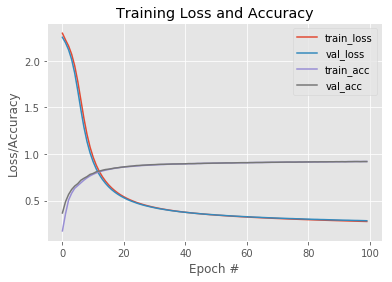

In [91]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('mnist_accuracy.png')